In [33]:
import numpy as np
import cv2
from keras.preprocessing import image

In [2]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [3]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

In [35]:
#face expression recognizer initialization
from keras.models import model_from_json
#path2 = '..\\Emotion\\Optimization\\'
model = model_from_json(open("shallowModel.json").read())#, custom_objects={'swish_activation':swish_activation})
model.load_weights('shallowModel.h5') #load weights

In [36]:
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
#path = '..\\DataSet\\fer2013\\'
x = pd.read_csv('fer2013.csv')
print (x.values.shape)

(35887, 3)


In [39]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [40]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [41]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [42]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [43]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [44]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [45]:
X.shape
x = X
x = x / 255

In [46]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [47]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [48]:
X_train = X_train.reshape((X_train.shape[0], 1 , 48, 48 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 1 ,48, 48))

In [49]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [50]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 1, 48, 48) (3590, 7)


In [51]:
print (y_.shape)

(35887, 7)


In [52]:
Y_test = y_[32300:]
print (Y_test.shape)

(3587, 7)


In [53]:
X_test = x[32300:, :]
print(X_test.shape)

(3587, 2304)


In [59]:
X_test = X_test.reshape((X_test.shape[0], 48 , 48, 1 ))

In [60]:
print(X_test.shape)

(3587, 48, 48, 1)


In [61]:
y_pred = model.predict_classes(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
import seaborn as sns


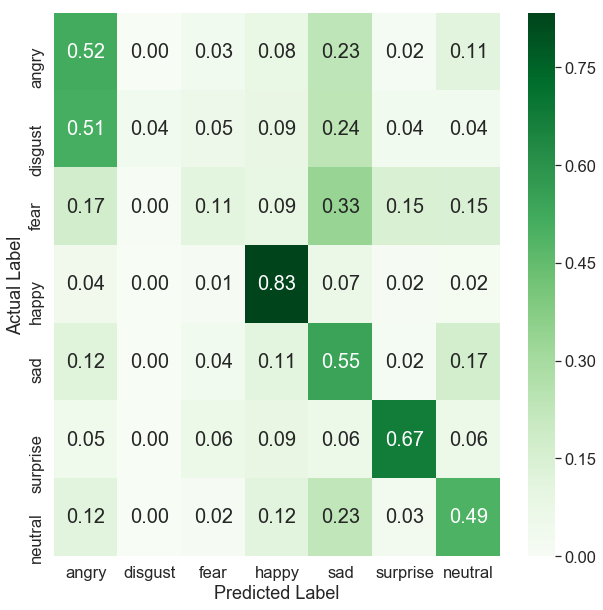

In [65]:

y_true = np.asarray([np.argmax(i) for i in Y_test])

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    cm_norm, annot=True, linewidths=0, square=False, cmap='Greens', 
    yticklabels=emotions, xticklabels=emotions, 
    vmin=0, vmax=np.max(cm_norm), fmt='.2f', 
    annot_kws={'size': 20}
)
ax.set(xlabel='Predicted Label', ylabel='Actual Label')
plt.show()